In [10]:
# Import the random module
import random
import requests as requests
from config import weather_api_key
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

# import the NumPy module
import numpy as np


In [11]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities

cities=[]

# Identify the nearest city fir each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

755

In [14]:
# initialize URL

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc2c9b09240fe276e76a2f6d78ccc027"

In [15]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval
----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | bayan
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | nioki
Processing Record 10 of Set 1 | tres arroyos
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | gamboula
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | hatillo
Processing Record 20 of Set 1 | saint-augustin
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | bolshoye sorokino
City not found. Skipp

Processing Record 39 of Set 4 | amot
Processing Record 40 of Set 4 | coihaique
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | batemans bay
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | banda aceh
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | steamboat springs
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | quatre cocos
Processing Record 50 of Set 4 | achisay
City not found. Skipping...
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | agdas
Processing Record 3 of Set 5 | perevolotskiy
Processing Record 4 of Set 5 | manitouwadge
Processing Record 5 of Set 5 | westmont
Processing Record 6 of Set 5 | kalaleh
Processing Record 7 of Set 5 | marawi
Processing Record 8 of Set 5 | san rafael
Processing Record 9 of Set 5 | nuuk
Processing Record 10 of Set 5 | tasiilaq


Processing Record 25 of Set 8 | rio verde de mato grosso
Processing Record 26 of Set 8 | carmen
Processing Record 27 of Set 8 | malya
Processing Record 28 of Set 8 | gigmoto
Processing Record 29 of Set 8 | nantucket
Processing Record 30 of Set 8 | morondava
Processing Record 31 of Set 8 | ketchikan
Processing Record 32 of Set 8 | san pedro
Processing Record 33 of Set 8 | champerico
Processing Record 34 of Set 8 | viedma
Processing Record 35 of Set 8 | lukovetskiy
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | stromness
Processing Record 38 of Set 8 | muli
Processing Record 39 of Set 8 | tamandare
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | anadyr
Processing Record 42 of Set 8 | puerto madryn
Processing Record 43 of Set 8 | aksarka
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | cheney
Processing Record 46 of Set 8 | appingedam
Processing Record 47 of Set 8 | neuquen
Processing Record 48 of Set 8 | trabzo

Processing Record 13 of Set 12 | kargopol
Processing Record 14 of Set 12 | atasu
Processing Record 15 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 16 of Set 12 | sorland
Processing Record 17 of Set 12 | vao
Processing Record 18 of Set 12 | zyryanka
Processing Record 19 of Set 12 | lasem
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | sakakah
Processing Record 22 of Set 12 | matara
Processing Record 23 of Set 12 | beroroha
Processing Record 24 of Set 12 | rogun
City not found. Skipping...
Processing Record 25 of Set 12 | hualmay
Processing Record 26 of Set 12 | simao
Processing Record 27 of Set 12 | alugan
Processing Record 28 of Set 12 | kedrovyy
Processing Record 29 of Set 12 | tianpeng
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | ibra
Processing Record 32 of Set 12 | capaci
Processing Record 33 of Set 12 | newport
Processing Record 34 of Set 12 | komsomolskiy
Processing Record 35 of Set 12 | hai

Processing Record 48 of Set 15 | semporna
Processing Record 49 of Set 15 | fougamou
Processing Record 50 of Set 15 | sakaiminato
Processing Record 1 of Set 16 | aljezur
Processing Record 2 of Set 16 | vila
Processing Record 3 of Set 16 | stykkisholmur
Processing Record 4 of Set 16 | hearst
Processing Record 5 of Set 16 | darnah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Get the numer of cities in city_data
len(city_data)

696

In [18]:
# Convert the array of dictionaries to a Pandas DataFrames
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.0531,-135.3300,53.49,71,75,5.75,US,2022-06-18 14:13:28
1,Bayan,46.0833,127.4000,63.90,85,67,1.66,CN,2022-06-18 14:15:27
2,Luderitz,-26.6481,15.1594,61.68,79,100,10.04,NA,2022-06-18 14:15:27
3,Hilo,19.7297,-155.0900,74.28,100,100,3.44,US,2022-06-18 14:15:28
4,Ponta Do Sol,32.6667,-17.1000,74.03,75,1,1.74,PT,2022-06-18 14:15:28
5,Raudeberg,61.9875,5.1352,54.27,81,8,28.59,NO,2022-06-18 14:15:29
6,Tuatapere,-46.1333,167.6833,45.14,86,100,5.35,NZ,2022-06-18 14:15:29
7,Nioki,-2.7167,17.6833,91.60,30,100,4.00,CD,2022-06-18 14:15:30
8,Tres Arroyos,-38.3739,-60.2798,46.51,39,2,11.52,AR,2022-06-18 14:15:31
9,Constitucion,-35.3333,-72.4167,50.56,72,38,4.38,CL,2022-06-18 14:15:31


In [19]:
# Reorganize the columns in city_data DataFrame

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-06-18 14:13:28,57.0531,-135.3300,53.49,71,75,5.75
1,Bayan,CN,2022-06-18 14:15:27,46.0833,127.4000,63.90,85,67,1.66
2,Luderitz,NA,2022-06-18 14:15:27,-26.6481,15.1594,61.68,79,100,10.04
3,Hilo,US,2022-06-18 14:15:28,19.7297,-155.0900,74.28,100,100,3.44
4,Ponta Do Sol,PT,2022-06-18 14:15:28,32.6667,-17.1000,74.03,75,1,1.74
...,...,...,...,...,...,...,...,...,...
691,Aljezur,PT,2022-06-18 14:35:44,37.3191,-8.8033,72.41,59,0,9.53
692,Vila,PT,2022-06-18 14:35:44,42.0304,-8.1588,68.70,56,95,8.48
693,Stykkisholmur,IS,2022-06-18 14:35:45,65.0757,-22.7297,49.19,70,82,11.65
694,Hearst,CA,2022-06-18 14:32:29,49.6835,-83.6665,53.85,33,4,10.49


In [20]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# Export the file City_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")


In [22]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df["Wind Speed"]

# Import the time module
import time

# Get today's date in seconds
today = time.time()
today

1655562968.762403

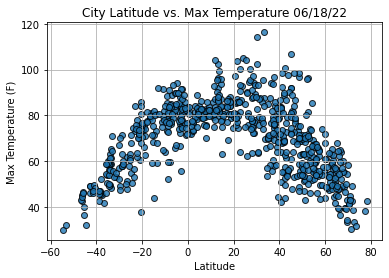

In [30]:
# Build the scatter plot for lat vs Max Temp

plt.scatter(lats, max_temp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig1.png")

# Show the plot
plt.show()

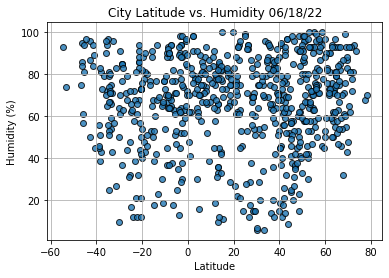

In [31]:
# Build the scatter plot for lat vs Humidity

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig2.png")

# Show the plot
plt.show()

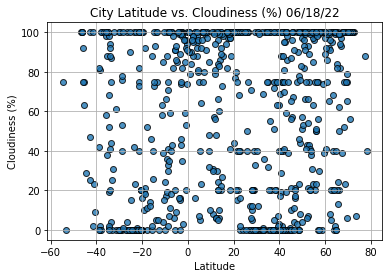

In [32]:
# Build the scatter plot for lat vs Cloudiness

plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig3.png")

# Show the plot
plt.show()

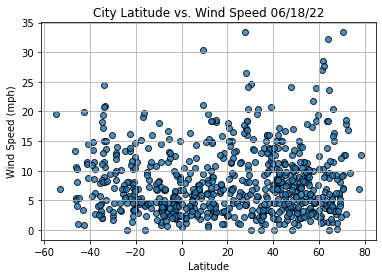

In [33]:
# Build the scatter plot for lat vs Wind Speed

plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig4.png")

# Show the plot
plt.show()

SyntaxError: invalid syntax (3528599804.py, line 1)